In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data#
df = pd.read_csv("/Users/bhagyashrikadam/Documents/NEU_ASSIGNMENTS/ALY6020/Module2/car.csv")

In [3]:
df.shape

(398, 8)

In [4]:
print(df.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


In [5]:
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [6]:
## PART1 ##

## Data Cleaning ##

# Checking the number of missing values ##
missing_values = df.isnull().sum()
print(missing_values)

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


In [7]:
# Inspect the unique values in the 'Horsepower' column
unique_horsepower = df['Horsepower'].unique()
unique_horsepower

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
# Replace '?' with NaN in the 'Horsepower' column
df['Horsepower'].replace('?', value=np.nan, inplace=True)
# Convert 'Horsepower' to numeric data type
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

In [9]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [10]:
# Impute missing values in the 'Horsepower' column with the mean value of the column
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)

# Verify if there are any missing values left in the dataset
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [11]:
# Descriptive Statistics #

df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


In [12]:
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


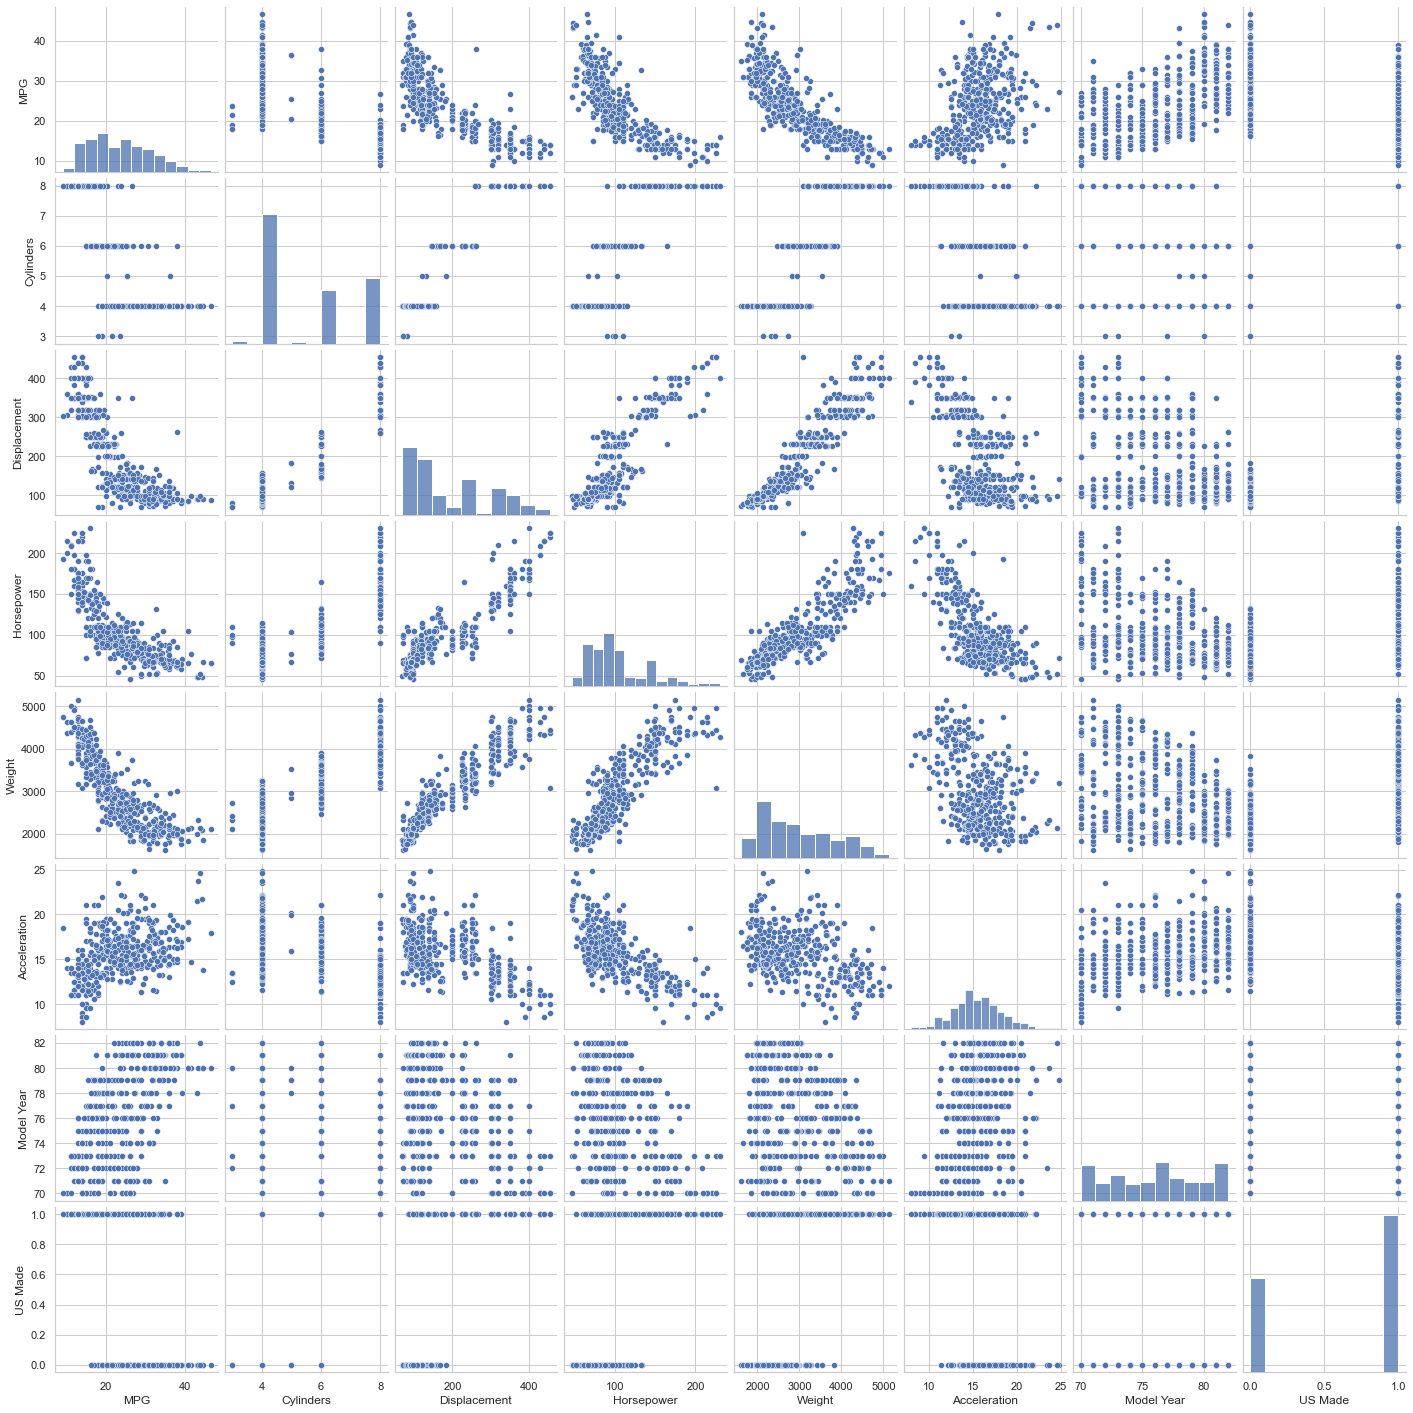

In [13]:
### EDA ###

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style='whitegrid')

# Plot pairplot to visualize the relationships between variables
sns.pairplot(df)
plt.show()


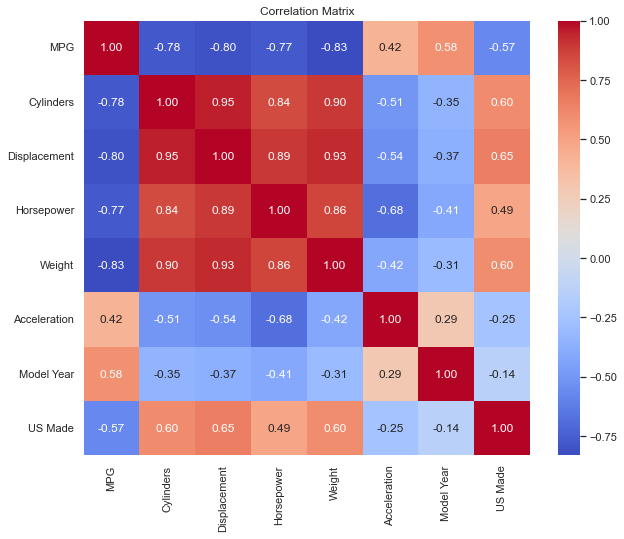

In [14]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap to visualize the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## mpg --> acceleration , model year

In [12]:
## Linear Regression Model ##

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the features (independent variables) and the target (dependent variable)
X = df.drop('MPG', axis=1)  # Features
y = df['MPG']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
import statsmodels.api as sm

#Adding a constant to the feature matrix for OLS with all features
X_train_ols = sm.add_constant(X_train)

# Initializing the OLS model with all features
ols_model = sm.OLS(y_train, X_train_ols)

# Fitting the OLS model with all features
ols_results = ols_model.fit()

# Displaying the OLS model summary with all features
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          6.29e-111
Time:                        20:30:16   Log-Likelihood:                -837.69
No. Observations:                 318   AIC:                             1691.
Df Residuals:                     310   BIC:                             1721.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.9683      5.383     -3.524      0.000     -29.560      -8.376
Cylinders       -0.1744      0.377     -0.462      0.644      -0.917       0.568
Displacement     0.0195      0.009      2.197      0.029       0.002       0.037
Horsepower      -0.0139      0.015     -0.923      0.357      -0.044       0.016
Weight          -0.0070      0.001     -9.680      0.000      -0.008      -0.006
Acceleration     0.0733      0.108      0.676      0.499      -0.140       0.287
Model Year       0.8230      0.060     13.705      0.000       0.705       0.941
US Made         -2.7904      0.554     -5.033      0.000      -3.881      -1.700
==============================================================================
Omnibus:                       16.654   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.760
Skew:                           0.424   Prob(JB):                     1.88e-05
Kurtosis:                       3.962   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Selecting only the statistically significant features identified by the OLS model
significant_features = ['Displacement', 'Weight', 'Model Year', 'US Made']

# Creating a new feature matrix (X) with only the significant features
X_refined = df[significant_features]
y_refined = df['MPG']  # Target remains the same

# Splitting the refined data into training and testing sets
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined, y_refined, test_size=0.2, random_state=42)

# Adding a constant to the refined feature matrix for OLS with significant features
X_train_ols_refined = sm.add_constant(X_train_refined)

# Initializing the OLS model with significant features
ols_model_refined = sm.OLS(y_train_refined, X_train_ols_refined)

# Fitting the OLS model with significant features
ols_results_refined = ols_model_refined.fit()

# Displaying the OLS model summary with significant features
ols_results_refined.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     348.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          6.04e-114
Time:                        20:30:22   Log-Likelihood:                -839.42
No. Observations:                 318   AIC:                             1689.
Df Residuals:                     313   BIC:                             1708.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.9871      4.605     -4.340      0.000     -29.048     -10.926
Displacement     0.0107      0.006      1.896      0.059      -0.000       0.022
Weight          -0.0070      0.001    -11.209      0.000      -0.008      -0.006
Model Year       0.8398      0.059     14.301      0.000       0.724       0.955
US Made         -2.5289      0.532     -4.756      0.000      -3.575      -1.483
==============================================================================
Omnibus:                       20.689   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.469
Skew:                           0.447   Prob(JB):                     1.47e-07
Kurtosis:                       4.255   Cond. No.                     7.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
## Calculating Multicollinearity##

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the Variance Inflation Factor (VIF) for each predictor variable in the refined model
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_ols_refined.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_ols_refined.values, i) for i in range(X_train_ols_refined.shape[1])]

# Displaying the VIF for each predictor variable
vif_data

,Feature,VIF
0,const,577.763731
1,Displacement,9.147376
2,Weight,7.504535
3,Model Year,1.215967
4,US Made,1.820897


In [16]:
# Calculating the correlation of 'Displacement' and 'Weight' with 'MPG'
displacement_mpg_corr = X_train_refined['Displacement'].corr(y_train_refined)
weight_mpg_corr = X_train_refined['Weight'].corr(y_train_refined)

# Displaying the correlation of 'Displacement' and 'Weight' with 'MPG'
{'Displacement-MPG Correlation': displacement_mpg_corr, 'Weight-MPG Correlation': weight_mpg_corr}

{'Displacement-MPG Correlation': -0.8015430378252908,
 'Weight-MPG Correlation': -0.8273329506512225}

In [21]:
# Removing 'Displacement' from the feature matrix to address multicollinearity
X_train_refined = X_train_refined.drop(columns=['Displacement'])
X_test_refined = X_test_refined.drop(columns=['Displacement'])


# Adding a constant to the refined feature matrix for OLS with significant features after addressing multicollinearity
X_train_ols_refined = sm.add_constant(X_train_refined)

# Initializing the OLS model with significant features after addressing multicollinearity
ols_model_refined = sm.OLS(y_train_refined, X_train_ols_refined)

# Fitting the OLS model with significant features after addressing multicollinearity
ols_results_refined = ols_model_refined.fit()

# Displaying the OLS model summary with significant features after addressing multicollinearity
ols_results_refined.summary()

KeyError: "['Displacement'] not found in axis"

In [17]:
## Evaluating model on the test set##

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Adding a constant to the refined test feature matrix for OLS
X_test_ols_refined = sm.add_constant(X_test_refined)

# Predicting the MPG on the test set using the OLS model
y_pred_ols_refined = ols_results_refined.predict(X_test_ols_refined)

# Calculating the Mean Squared Error (MSE) on the test set for the OLS model
mse_ols_refined = mean_squared_error(y_test_refined, y_pred_ols_refined)

# Calculating the R-squared score on the test set for the OLS model
r2_ols_refined = r2_score(y_test_refined, y_pred_ols_refined)

# Displaying the model evaluation metrics on the test set for the OLS model
print('OLS Mean Squared Error:', mse_ols_refined)
print('OLS R-squared Score:', r2_ols_refined)


OLS Mean Squared Error: 8.567875564462955
OLS R-squared Score: 0.8406464149962874


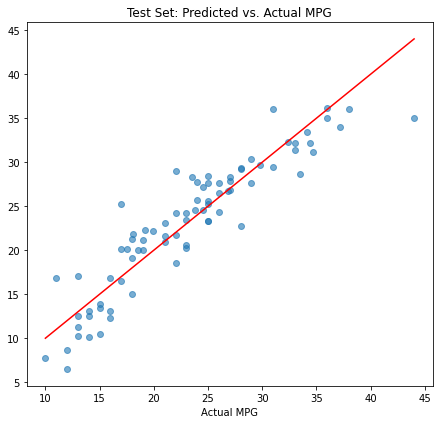

In [18]:
# Predicting the MPG on the test set using the refined model

# Creating scatter plots of predicted vs. actual MPG values for both the training and test sets
plt.figure(figsize=(12, 6))


# Predicting the MPG on the test set using the OLS model
y_pred_ols_refined = ols_results_refined.predict(X_test_ols_refined)


# Scatter plot for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_refined, y_pred_ols_refined, alpha=0.6)
plt.plot([min(y_test_refined), max(y_test_refined)], [min(y_test_refined), max(y_test_refined)], color='red') # Line of best fit
plt.title('Test Set: Predicted vs. Actual MPG')
plt.xlabel('Actual MPG')

plt.tight_layout()
plt.show()